<a href="https://colab.research.google.com/github/Mohramdani28/CertaintyFactor-FuzzyLogic_2306062_mohramdani-/blob/main/Fuzzy_logic_Code4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuzzy Logic

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


Tugas FZ
1. Ubah input_suhu jadi 22°C. Apa yang terjadi?
*  Suhu 22°C memiliki keanggotaan tinggi pada kategori dingin.
*  Kelembaban 75% memiliki keanggotaan tinggi pada kategori lembab.
*  Aturan yang sesuai adalah rule3: temperature['dingin'] & humidity
['lembab'] → fan_speed['rendah'].

2. Tambahkan variabel kelembaban dan buat aturan baru (contoh: jika panas DAN lembab, kipas cepat) -> contoh ini tidak boleh digunakan :
*   saya menambahkan (temperature['nyaman'] & humidity['lembab'], fan_speed['sedang'])

3. Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?

Karena fungsi keanggotaan fuzzy bersifat overlap, artinya:
Suhu 28°C terletak di area tumpang tindih antara kurva nyaman dan panas Dalam kurva segitiga :
- nyaman didefinisikan sebagai [22, 26, 30] → 28 ada di sisi kanan segitiga.
- panas didefinisikan sebagai [28, 32, 40] → 28 adalah sisi kiri segitiga.
Akibatnya:
Suhu 28 memiliki dua nilai keanggotaan non-nol:
- nyaman → nilai menurun dari puncak (30) ke 0.
- panas → nilai meningkat dari 28 ke puncaknya di 32.
Ini merupakan kekuatan dari logika fuzzy, karena mendukung keputusan berdasarkan input yang tidak pasti atau ambigu.


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00


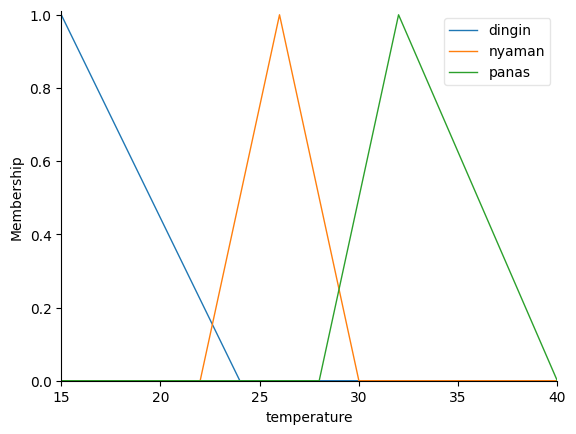

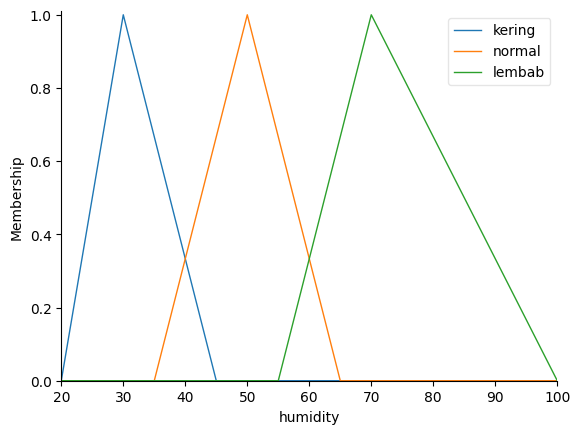

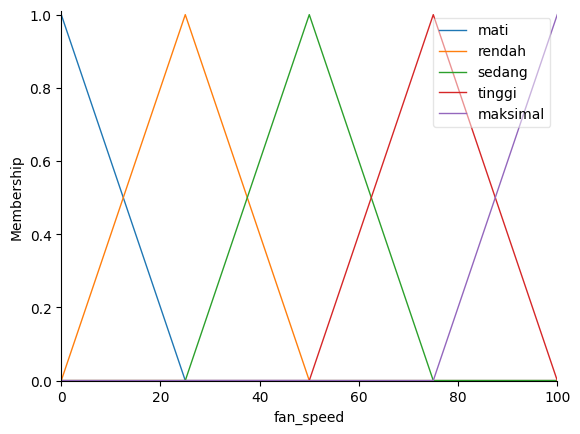

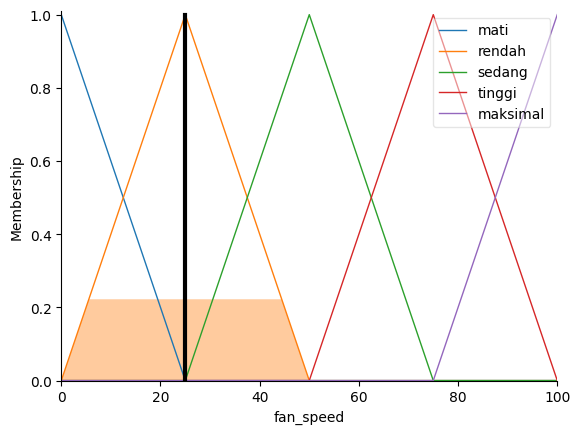

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trimf(temperature.universe, [15, 15, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trimf(temperature.universe, [28, 32, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trimf(humidity.universe, [20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trimf(humidity.universe, [55, 70, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['sedang'])# Tambahan baru yang berbeda
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 22
ac.input['humidity'] = 75
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}")
fan_speed.view(sim=ac)
plt.show()
